In [2]:
import pandas as pd

# Load data from different file formats

# Try reading the CSV file with a different encoding to handle the UnicodeDecodeError
csv_data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')

# Load Excel and JSON data
excel_data = pd.read_excel('sales_data_sample.xlsx')
json_data = pd.read_json('myData.json')

In [4]:
# Explore the structure and content of CSV
print(csv_data.head())
print(csv_data.info())
print(csv_data.describe())
print(csv_data.isnull().sum())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [5]:
# Explore the structure and content of Excel
print(excel_data.head())
print(excel_data.info())
print(excel_data.describe())
print(excel_data.isnull().sum())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [7]:
# Explore the structure and content of JSON
print(json_data.head())
print(json_data.info())
print(json_data.describe())
print(json_data.isnull().sum())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue                          NYC    NY   
1             59 rue de l'Abbaye              

In [9]:
# Handle missing values by filling with mean or dropping rows
csv_data.fillna(0, inplace=True)  # For numerical columns
csv_data.dropna(inplace=True)  # Drop rows with missing values in a specific column


In [10]:
print(csv_data.isnull().sum())

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


In [11]:
# Remove duplicates
csv_data.drop_duplicates(inplace=True)


In [12]:
# Convert 'ORDERDATE' to datetime format
csv_data['ORDERDATE'] = pd.to_datetime(csv_data['ORDERDATE'], errors='coerce')

In [13]:
# Remove duplicate rows
csv_data.drop_duplicates(subset='ORDERNUMBER', inplace=True)

In [14]:
print(csv_data.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0 2003-02-24  Shipped       1         2     2003  ...   
1 2003-05-07  Shipped       2         5     2003  ...   
2 2003-07-01  Shipped       3         7     2003  ...   
3 2003-08-25  Shipped       3         8     2003  ...   
4 2003-10-10  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue             0            NYC    NY   
1             59 rue de l'Abbaye             0          Reims     0   
2  27 rue d

In [15]:
# Concatenate the dataframes
all_data = pd.concat([csv_data, excel_data, json_data], ignore_index=True)

# Check the structure of the combined dataframe
print(all_data.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

             ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0  2003-02-24 00:00:00  Shipped       1         2     2003  ...   
1  2003-05-07 00:00:00  Shipped       2         5     2003  ...   
2  2003-07-01 00:00:00  Shipped       3         7     2003  ...   
3  2003-08-25 00:00:00  Shipped       3         8     2003  ...   
4  2003-10-10 00:00:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue             0            NYC    NY   
1             59 rue d

In [16]:
# Filter for sales greater than 5000
high_sales = all_data[all_data['SALES'] > 5000]

# Print the filtered DataFrame
print(high_sales)


      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
4           10159               49      100.0               14  5205.27   
7           10188               48      100.0                1  5512.32   
20          10341               41      100.0                9  7737.93   
25          10417               66      100.0                2  7516.08   
26          10103               26      100.0               11  5404.62   
...           ...              ...        ...              ...      ...   
5815        10361               44      100.0               10  5001.92   
5816        10375               44      100.0               11  5208.72   
5819        10401               77       92.0                9  7084.00   
5845        10397               48      100.0                3  5192.64   
5950        10386               43      100.0                4  5417.57   

                ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
4     2003-10-10 00:00:00   

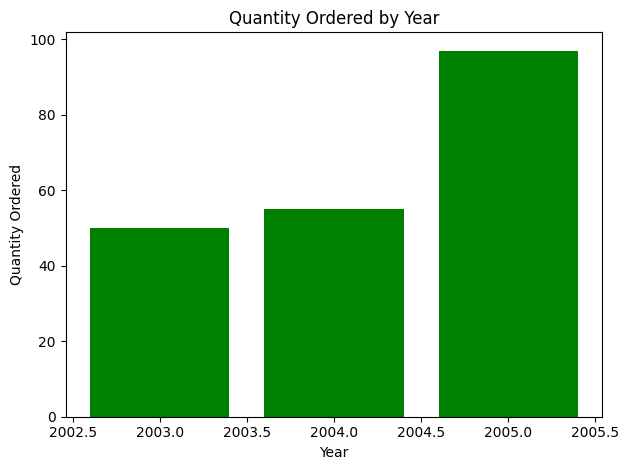

In [23]:
import matplotlib.pyplot as plt

# Create a bar plot for YEAR_ID and QUANTITYORDERED
plt.bar(all_data['YEAR_ID'], all_data['QUANTITYORDERED'], color='green')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered by Year')

# Show the plot
plt.tight_layout()
plt.show()


In [24]:
# Extract useful information (e.g., year from ORDERDATE if necessary)
all_data['ORDERDATE'] = pd.to_datetime(all_data['ORDERDATE'])
all_data['YEAR'] = all_data['ORDERDATE'].dt.year


In [26]:
print(all_data.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... ADDRESSLINE2  \
0 2003-02-24  Shipped       1         2     2003  ...            0   
1 2003-05-07  Shipped       2         5     2003  ...            0   
2 2003-07-01  Shipped       3         7     2003  ...            0   
3 2003-08-25  Shipped       3         8     2003  ...            0   
4 2003-10-10  Shipped       4        10     2003  ...            0   

            CITY STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME  \
0            NYC    NY      10022     USA         0              Yu   
1   

In [27]:
# Total sales
total_sales = all_data['SALES'].sum()
print(f'Total Sales: {total_sales}')

# Average order value
avg_order_value = all_data['SALES'].mean()
print(f'Average Order Value: {avg_order_value}')


Total Sales: 21473923.18
Average Order Value: 3607.2439408701493


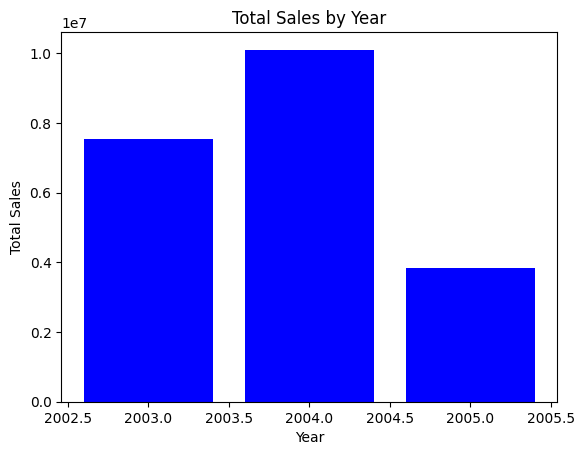

In [29]:
import matplotlib.pyplot as plt

# Group data by 'YEAR' and calculate total sales for each year
sales_by_year = all_data.groupby('YEAR')['SALES'].sum().reset_index()

# Create a bar plot for total sales by year
plt.bar(sales_by_year['YEAR'], sales_by_year['SALES'], color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

# Show the plot
plt.show()



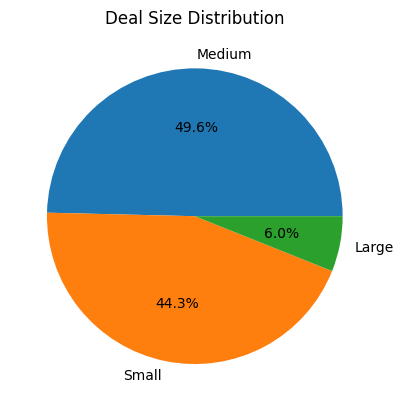

In [30]:
import matplotlib.pyplot as plt

# Create a pie chart for deal size distribution
all_data['DEALSIZE'].value_counts().plot.pie(autopct='%1.1f%%')

# Add title
plt.title('Deal Size Distribution')
plt.ylabel('')  # Remove the default ylabel for a cleaner look
plt.show()


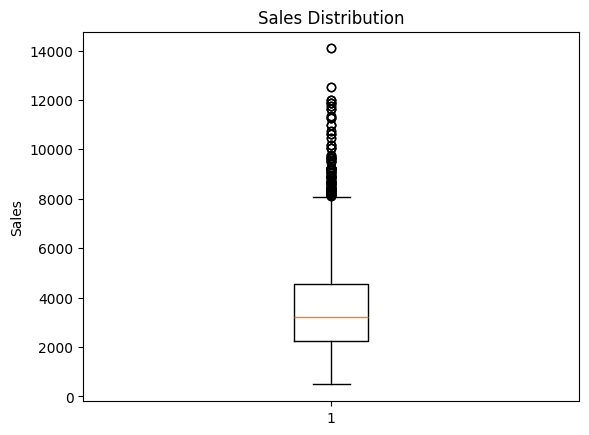

In [31]:
# Create a box plot for sales
plt.boxplot(all_data['SALES'])

# Add labels and title
plt.ylabel('Sales')
plt.title('Sales Distribution')
plt.show()
